In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.image as mpimg
from matplotlib import colors
from matplotlib.cm import ScalarMappable,get_cmap
from matplotlib.patches import Patch
from plot_utils import set_size

In [2]:
# DATA PARAMS
phis = np.array([12, 50, 87, 125, 162, 200, 237, 275, 312, 350, 387, 425, 462, 500, 537, 575, 612, 650, 687, 725])
max_deg = 7

In [3]:
# PLOT PARAMS
plt.rcParams['font.size'] = 8                 
plt.rcParams['axes.titlesize'] = 8
plt.rcParams['lines.linewidth'] = 1           
plt.rcParams['lines.markersize'] = 3
plt.rcParams['figure.figsize'] = set_size(252,subplots=(3,2))
plt.rcParams['xtick.major.size'] = 3
plt.rcParams['xtick.major.width'] = 0.5
plt.rcParams['xtick.minor.size'] = 1.
plt.rcParams['xtick.minor.width'] = 0.5
plt.rcParams['ytick.major.size'] = 3
plt.rcParams['ytick.major.width'] = 0.5
plt.rcParams['ytick.minor.size'] = 1.
plt.rcParams['ytick.minor.width'] = 0.5
plt.rcParams['xtick.major.pad']=1.5
plt.rcParams['ytick.major.pad']=1.5
plt.rcParams['legend.fontsize'] = 8
plt.rcParams['legend.handlelength'] = plt.rcParams['legend.handleheight']
plt.rcParams['legend.columnspacing'] = 0.8
plt.rcParams['legend.handletextpad'] = 0.4

plt.rcParams['axes.linewidth'] = 0.5

cmap = get_cmap('CMRmap')

fmt = 'eps'

/tmp/ipykernel_108188/4190183158.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('CMRmap')


In [4]:
sigma = 5 # noise standrad deviation used in noisy simulations

# capacity data
results_exp = np.zeros((2,phis.size,max_deg))
results_sim = np.zeros((2,phis.size,max_deg))
results_noiseless = np.zeros((2,phis.size,max_deg))


for i,beta in enumerate([0.2,0.8]):
    # experiment
    path_exp = '../data/capacities/phi_sweep_gamma60_beta'+str(beta).replace('.','-')+'_long/results/results_exp_final_gamma60_beta'+str(beta).replace('.','-')+'.dat'
    results_exp[i] = np.genfromtxt(path_exp)[:,1:max_deg+1]
    
    # simulation
    path_sim = '../data/capacities/phi_sweep_gamma60_beta'+str(beta).replace('.','-')+'_long/corresponding_simulation/noise/results_sim_final_sigma'+str(sigma)+'_gamma60_beta'+str(beta).replace('.','-')+'.dat'
    path_noiseless = '../data/capacities/phi_sweep_gamma60_beta'+str(beta).replace('.','-')+'_long/corresponding_simulation/noise/results_sim_final_sigma0_gamma60_beta'+str(beta).replace('.','-')+'.dat'
    results_sim[i] = np.genfromtxt(path_sim)[:,1:max_deg+1]
    results_noiseless[i] = np.genfromtxt(path_noiseless)[:,1:max_deg+1]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


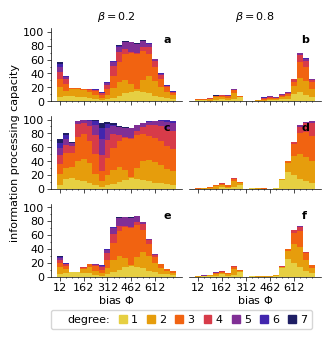

In [5]:
raster = True
dpi = 300


fig = plt.figure(constrained_layout=False)

gs = GridSpec(3,2,figure=fig,wspace=0.05)

# common y-label for capacity plots
ax_cap_label = fig.add_subplot(gs[:,:])
ax_cap_label.set_ylabel('information processing capacity',labelpad=22)
ax_cap_label.xaxis.set_visible(False)
# make spines (the box) invisible
plt.setp(ax_cap_label.spines.values(), visible=False)
# remove ticks and labels for the left axis
ax_cap_label.tick_params(left=False, labelleft=False)
#remove background patch (only needed for non-white background)
ax_cap_label.patch.set_visible(False)

ax_beta02_exp = fig.add_subplot(gs[0,0])
ax_beta08_exp = fig.add_subplot(gs[0,1])

ax_beta02_nonoise = fig.add_subplot(gs[1,0])
ax_beta08_nonoise = fig.add_subplot(gs[1,1])

ax_beta02_sim = fig.add_subplot(gs[2,0])
ax_beta08_sim = fig.add_subplot(gs[2,1])


# Capacities
## limits
ax_beta02_exp.set_ylim([0,105])
ax_beta08_exp.set_ylim([0,105])

ax_beta02_sim.set_ylim([0,105])
ax_beta08_sim.set_ylim([0,105])

ax_beta02_nonoise.set_ylim([0,105])
ax_beta08_nonoise.set_ylim([0,105])

## ticks
tickstep = 4
axes = [ax_beta02_exp,ax_beta02_sim,ax_beta02_nonoise,ax_beta08_exp,ax_beta08_sim,ax_beta08_nonoise]
for ax in axes:
    ax.set_xticks(phis[::tickstep])
    ax.set_xticks(phis,minor=True)
    ax.set_xticklabels([])

ax_beta02_exp.set_yticks(np.arange(0,120,20))
ax_beta08_exp.set_yticks([])

ax_beta02_sim.set_yticks(np.arange(0,120,20))
ax_beta08_sim.set_yticks([])

ax_beta02_nonoise.set_yticks(np.arange(0,120,20))
ax_beta08_nonoise.set_yticks([])

ax_beta02_sim.set_xticklabels(phis[::tickstep])
ax_beta08_sim.set_xticklabels(phis[::tickstep])

ax_beta02_exp.set_yticklabels(np.arange(0,120,20))
ax_beta08_exp.set_yticklabels([])

ax_beta02_sim.set_yticklabels(np.arange(0,120,20))
ax_beta08_sim.set_yticklabels([])

ax_beta02_nonoise.set_yticklabels(np.arange(0,120,20))
ax_beta08_nonoise.set_yticklabels([])     

## headings & labels
ax_beta02_exp.set_title(r'$\beta = 0.2$',)
ax_beta08_exp.set_title(r'$\beta = 0.8$')

axes_exp = [ax_beta02_exp,ax_beta08_exp]
axes_sim = [ax_beta02_sim,ax_beta08_sim]
axes_nonoise = [ax_beta02_nonoise,ax_beta08_nonoise]

# removing spines
for ax_sim,ax_exp,ax_nonoise in zip(axes_sim,axes_exp,axes_nonoise):
    ax_exp.spines['top'].set_visible(False)
    ax_sim.spines['top'].set_visible(False)
    ax_nonoise.spines['top'].set_visible(False)
    ax_exp.spines['right'].set_visible(False)
    ax_sim.spines['right'].set_visible(False)
    ax_nonoise.spines['right'].set_visible(False)
    

for ax in [ax_beta08_exp,ax_beta08_sim,ax_beta08_nonoise]:
    ax.spines['left'].set_visible(False)
    

for ax in axes_sim:
    ax.set_xticks(phis,minor=True)

ax_beta02_exp.set_yticks(np.arange(0,100,10),minor=True)
ax_beta02_sim.set_yticks(np.arange(0,100,10),minor=True)
ax_beta02_nonoise.set_yticks(np.arange(0,100,10),minor=True)


width = 38
data_color = np.linspace(0.8,0.1,max_deg)
degree_colors = cmap(data_color)

for ax in axes_sim:
    ax.set_xlabel(r'bias $\Phi$',labelpad=0.5)

for ax_exp,ax_sim,ax_nonoise,r_exp,r_sim,r_nonoise in zip(axes_exp,axes_sim,axes_nonoise,results_exp,results_sim,results_noiseless):
    interim_exp = np.zeros(phis.shape)
    interim_sim = np.zeros(phis.shape)
    interim_nonoise = np.zeros(phis.shape)
    for d in range(max_deg):
        # experiment
        ax_exp.bar(phis,r_exp[:,d],bottom=interim_exp,width=width,color=degree_colors[d],rasterized=raster)
        interim_exp += r_exp[:,d]
        
        #simulation
        ax_sim.bar(phis,r_sim[:,d],bottom=interim_sim,width=width,color=degree_colors[d],rasterized=raster)
        interim_sim += r_sim[:,d]
        
        # noiseless simulation
        ax_nonoise.bar(phis,r_nonoise[:,d],bottom=interim_nonoise,width=width,color=degree_colors[d],rasterized=raster)
        interim_nonoise += r_nonoise[:,d]
        
# denote every subplot with a letter for reference
for ax,letter in zip(axes_exp+axes_nonoise+axes_sim,'abcdefghi'):
    ax.text(0.85,0.8,r'$\mathbf{{{}}}$'.format(letter),transform=ax.transAxes)

# legend
ph = [plt.plot([],marker="", ls="")[0]]
handles = ph + [Patch(color=degree_colors[d]) for d in range(max_deg)]
labels = ['degree:'] + [str(d+1) for d in range(max_deg)]
leg = fig.legend(ncol=max_deg+1,loc='upper center',bbox_to_anchor=(0.5,0.025),handles=handles,labels=labels,labelspacing=0.1)

plt.savefig(fmt+'/fig08_capacities_beta0-2_0-8.'+fmt,bbox_inches='tight',dpi=dpi)
plt.show()